<h1>Case Study 4 - Bank Account Balance Prediction</h1>

<h2>Problem Background</h2>

A small sample taken from a bank's customers is given by the data file Banking_Data_Set.csv. The ultimate goal is to come up with a prediction model which provides the Account Balance given 5 predictors.

**Requirments**

* A competitor claims that their average account balance is 1325 USD. With a 5% significance level, do you think that the current account balance of this bank is significantly higher than that of the competitor? State your hypotheses and the type of analysis (e.g., one-tailed or two-tailed test). Compute the p-value and make your decision. Report the effect size as well and interpret the output.
* Do you think there exists a statistically significant difference for account balance between those customers who have a Debit card and those who don't? Clearly state your hypotheses and make your decision assuming a significance level of 5%.
* Submit your best regression model for a prediction of the Account Balance. Which predictors do you think are important in the prediction of the target variable? Explain via plots and show that you conducted a thorough analysis for the problem. Considering the final regression model you report, show that this model isn't violating any of the basic assumptions used in building a linear multiple regression model.
* Do you have any outliers that you think are influential in the regression model?
 
**Data**

|Attribute| Values|
|-------|--------|
|Balance|Account Balance in dollars|
|ATM|Number of monthly ATM transactions|
|Services|Number of other bank services used|
|Debit|Has a debit card (yes/no)|
|Interest|Receives interest on the account (yes/no)|
|City|City where banking is done|

<h2>Data Preparation</h2>

In [1]:
#import needed libraries for analysis
import pandas as pd
import numpy as np

In [2]:
#read data to a pandas dataframe
df = pd.read_csv('Banking_Data_Set.csv')
df.head()

,Balance,ATM,Services,City,Debit,Interest
0,1756,13,4,2,no,yes
1,748,9,2,1,yes,no
2,1501,10,1,1,no,no
3,1831,10,4,3,no,yes
4,1622,14,6,4,no,yes


<h2>One-Sample T-test</h2>

To answer the first question and see if the current account balance is significantly higher than the competitor's, we will run a One-sample T-test, as it tests weather the mean of a population is different from a specified value.

The One-sample T-test can be One-tailed or Two-tailed based on the hypothesis. Since we are trying to see if the account balance is larger than the given value, then a One-tailed test with the following Null and Alternative Hypothesis will be suitable. 

**Hypothesis:**

* Null Hypothesis (H_0): The mean account balance is equal to 1325 USD (competitor average account balance)
* Alternative Hypothesis (H_a): The mean account balance is greater than 1325 USD

In [3]:
#import library needed for the test
from scipy.stats import ttest_1samp

#mean account balance of competitor
m = 1325
#significance level
alpha = 0.05

#run the test
results = ttest_1samp(df['Balance'], m)

#half the p-value for one-tailed test
print('P-value =', results[1]/2)

#check (p-value/2) to be lower than alpha 
#and sign of t-statistic to be positive ==> the sample mean is larger than m
if (results[1]/2 > alpha):
    print("Null hypothesis is accepted")
elif (results[0] > 0) & (results[1]/2 < alpha):
    print("Null hypothesis is rejected in favor of the alternative; mean is significantly greater than ${}".format(m))

P-value = 0.013462805769481744
Null hypothesis is rejected in favor of the alternative; mean is significantly greater than $1325


**Effect Size and Interpretation**

In order to quantify the magnitude of the difference, Cohen's d will be calculated. Cohen's d is defined as the difference between two means divided by a standard deviation for the data

| Effect Size        | D       |
|--------------------|---------|
| Very small         | 0.01    |
| Small              | 0.20    |
| Medium             | 0.50    |
| Large              | 0.80    |
| Very large         | 1.20    |

In [4]:
#calculate sample mean and StD
sample_mean = df['Balance'].mean()
sample_standard_deviation = df['Balance'].std()

#calculate cohen's d
cohens_d = (sample_mean - m)/sample_standard_deviation

#function to output the effect size based on value of cohen's d
def effect_size_calculation(cohens_d):
    
    if 0<=cohens_d<0.1:
        effect_size = "Very Small"
    elif 0.1<=cohens_d<0.35:
        effect_size = "Small"
    elif 0.35<=cohens_d<0.65:
        effect_size = "Medium"
    elif 0.65<=cohens_d<0.9:
        effect_size = "Large"
    elif cohens_d >= 0.9:
        effect_size = "Very Large"
    return effect_size

#call function to get the effect size
effect_size = effect_size_calculation(cohens_d)

#show results
print('A Cohens-d value of ', cohens_d, ' suggests a ', effect_size, 'effect size')

A Cohens-d value of  0.292955650522619  suggests a  Small effect size


It can be understood that, although there is a significant diffenance between the means of account balances of the two banks, this differance is small.

<h2>ANOVA Test</h2>

The second requrment is to answer if there is a statistically significant difference for account balance between those customers who have a Debit card and those who don't. Therefore, we will use the Analysis of Variance (ANOVA).

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups and returns an F-score and P-value.

In [5]:
#group data by 'Debit' and calculate mean account balance for each group
Debit_vs_Balance = df[['Debit', 'Balance']].groupby(['Debit']).mean()
Debit_vs_Balance

,Balance
Debit,
no,1435.823529
yes,1583.615385


**ANOVA Test**

For our test we will name two groups:
* Group A: Customers who have a debit card
* Group B: Customers who don't have a debit card

**Hypothesis:**

* Null Hypothesis (H_0): The means of account balance for the two groups are equal; M_a = M_b
* Alternative Hypothesis (H_a): The means of account balance for the two groups are not equal; M_a != M_b

In [7]:
#import library needed for the test
from scipy.stats import f_oneway

#group data by the 'Debit' variable
grouped_test = df[['Debit', 'Balance']].groupby(['Debit'])

# ANOVA
f_val, p_val = f_oneway(grouped_test.get_group('yes')['Balance'], grouped_test.get_group('no')['Balance'])  

#print results of test
print( "ANOVA results: F=", f_val, ", P =", p_val)

#check the P-value for significance; assuming alpha = 0.05
if p_val < 0.05:
    print('There is a statistically significant difference in account balance between the two groups')
else:
    print('There is no statistically significant difference in account balance between the two groups')

ANOVA results: F= 0.901711511352702 , P = 0.34626334317172347
There is no statistically significant difference in account balance between the two groups


<h2>Regression</h2>

The next step in our analysis is to build a Machine Learning Regression Model that best fits the Balance data given the other features in the dataframe. 

<h3>Choosing Input Features</h3>

We begin by choosing the input features to our model among the available Continuous and Categorical variables.

In [9]:
#import libraries needed for visual and quantifiable correlation analysis
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h4>Continuous Variables</h4>

There are two continuous variables amon our features, ATM and Services. We will analyze their correlation to the target variable, Balance, using Regression Plots and Pearson Correlation.

**ATM VS Balance**

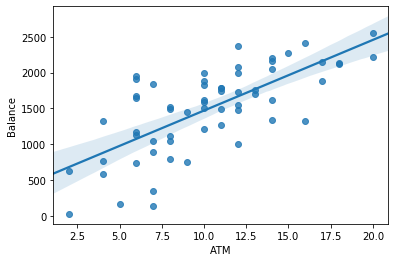

In [10]:
#plot regression plot of ATM VS Balance
sns.regplot(x='ATM',y='Balance',data=df)

In [12]:
#calculate pearson correlation between ATM and Balance
pearson_coef, p_value = pearsonr(df['ATM'], df['Balance'])
print("The Pearson Correlation Coefficient is", pearson_coef)

The Pearson Correlation Coefficient is 0.7089000425414076


**Servicecs VS Balance**

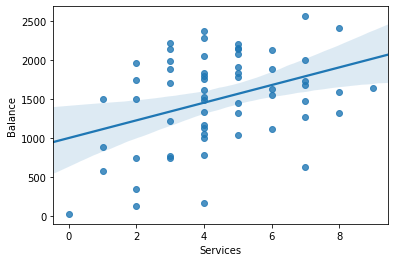

In [13]:
#plot regression plot of Services VS Balance
sns.regplot(x='Services',y='Balance',data=df)

In [14]:
#calculate pearson correlation between Services and Balance
pearson_coef, p_value = pearsonr(df['Services'], df['Balance'])
print("The Pearson Correlation Coefficient is", pearson_coef)

The Pearson Correlation Coefficient is 0.37388204952928433


<h4>Categorical Variables</h4>

We will visualize the three categorical variables in our features using boxplots. The three variables are City, Debit, and and Interest.

**City VS Balance**

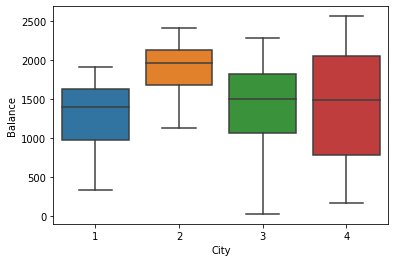

In [16]:
#plot boxplot of City VS Balance
sns.boxplot(x='City',y='Balance',data=df)

**Debit VS Balance**

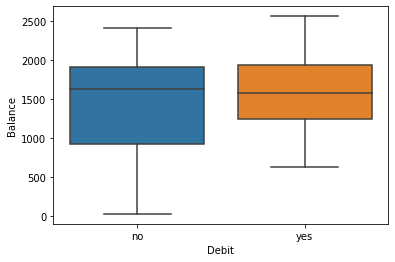

In [17]:
#plot boxplot of Debit VS Balance
sns.boxplot(x='Debit',y='Balance',data=df)

**Interest VS Balance**

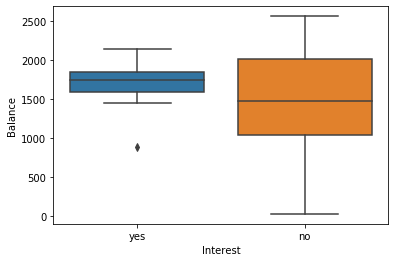

In [18]:
#plot boxplot of Interest VS Balance
sns.boxplot(x='Interest',y='Balance',data=df)

<h4>Conclusion</h4>

It can be seen that the features 'ATM' and 'Services' showed a positive linear relationship with the target variable 'Balance' with correlation values of 0.7 and 0.4 respectively. However, the distributions of 'Balance' between the different categories in each of the variables 'City', 'Debit', and 'Interest' have significant overlaps, so these variables would not make good predictors.

**Regression model predictors are:**
* ATM
* Services

<h3>Building The Model</h3>

In [19]:
#library for linear regression
from sklearn.linear_model import LinearRegression

#define the linear model
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#define input and target variables 
X = df[['ATM','Services']]
y = df['Balance']

#fit the model
lm.fit(X,y)
#show the intercept and coefficients of the model
print('The value of the intercept from the model is: ', lm.intercept_)
print('The coefficients of the model are: ', lm.coef_)

The value of the intercept from the model is:  258.29242924370783
The coefficients of the model are:  [91.43272499 67.88313284]


**Visualization:**

One way that multiple linear regression models can be visualized is using Distribution Plots, where we can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [21]:
#predict the target values from the model
y_hat = lm.predict(X)

Text(0, 0.5, 'Proportion of Customers')

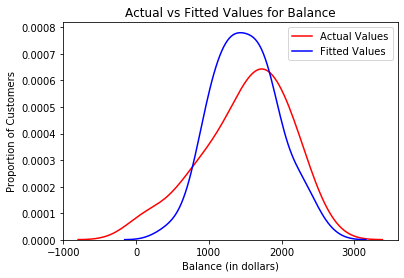

In [22]:
#plot and compare the two curves
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Values")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Balance')
plt.xlabel('Balance (in dollars)')
plt.ylabel('Proportion of Customers')

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap.

<h3>Model Evaluation</h3>

Testing for Linear Regression Assumptions:
* Linear relationship between input features and target variable
* Normality of variables
* No or little multicollinearity
* Homoscedasticity

<h4>1) Linearity between input and output variables</h4>

To test this linear relationship, we will use Scatter Plots and visually inspect a linear relationship.

**ATM VS Balance**

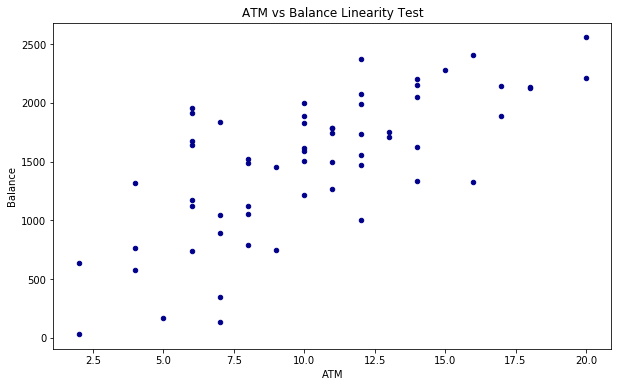

In [23]:
#plot a scatter plot of ATM VS Balance
df.plot(kind='scatter', x='ATM', y='Balance', figsize=(10, 6), color='darkblue')

plt.title('ATM vs Balance Linearity Test')
plt.xlabel('ATM')
plt.ylabel('Balance')

plt.show()

**Services VS Balance**

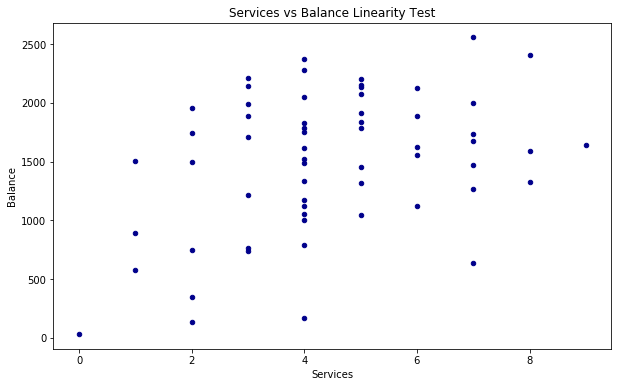

In [24]:
#plot a scatter plot of Services VS Balance
df.plot(kind='scatter', x='Services', y='Balance', figsize=(10, 6), color='darkblue')

plt.title('Services vs Balance Linearity Test')
plt.xlabel('Services')
plt.ylabel('Balance')

plt.show()

**Conclusion**

Although the points in the 'Services VS Balance' plot appear to be more scattered, it can be seen that both input variables have an overall linear relationship with the target variable.

<h4>2) Normality of Variables</h4>

For this assumption, variable should follow a normal distribution, testing will be done using a Q-Q-Plot, a technique to compare two probability distributions in a visual manner.

In [25]:
#import library for Q-Q-Plot
from scipy.stats import probplot

**ATM**

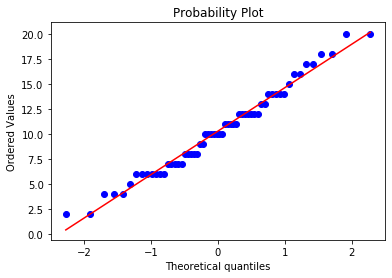

In [26]:
#Q-Q-Plot for ATM
probplot(df['ATM'], dist="norm", plot=plt)
plt.show()

**Services**

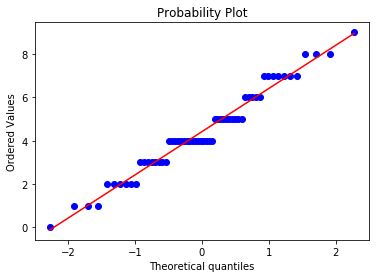

In [28]:
#Q-Q-Plot for Services
probplot(df['Services'], dist="norm", plot=plt)
plt.show()

**Conclusion**

Points in both plots are approximately located on the red line, indicating a normal distribution.

<h4>3) No or Little Multicollinearity</h4>

Multiple regression assumes that the independent variables are not highly correlated with each other. This can be tested using Pearson Correlation Matrix.

In [29]:
#calculate correlation matrix for the input variables
corr = df[['ATM','Services']].corr()
#use color coding
corr.style.background_gradient(cmap='coolwarm')

,ATM,Services
ATM,1,0.226541
Services,0.226541,1


**Conclusion**

The Pearson Correlation value between the independent variables ATM and Services is 0.2 showing low correlation.

<h4>4) Homoscedasticity</h4>

This assumption states that the variance of error terms are similar across the values of the independent variables. A plot of residuals versus predicted values can show whether points are equally distributed across all values of the independent variables.

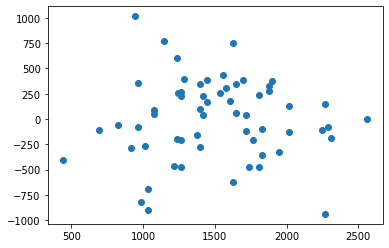

In [30]:
#calculate residuals
res = y-y_hat
#plot a scatter plot of residuals VS fitted values
plt.scatter(y_hat,res)

**Conclusion**

The residuals are distributed uniformly randomly around the zero x-axes and do not form specific clusters, then the assumption holds true.

<h3>Outliers</h3>

Cook’s distance is a common measurement of a data point’s influence. It’s a way to find influential outliers in a set of predictor variables when performing a least-squares regression analysis.

C:\Users\GTS\Anaconda\lib\site-packages\yellowbrick\regressor\influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


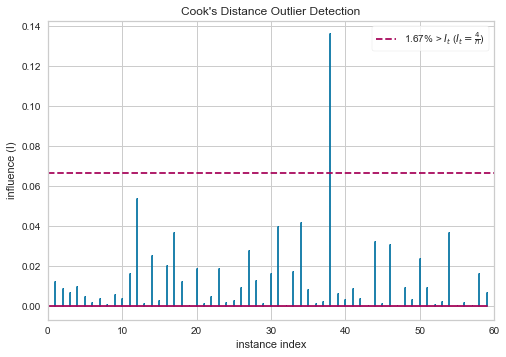

In [31]:
#import library for Cook's distance
from yellowbrick.regressor import CooksDistance

#define input features and target variable
X_cook = df[['ATM','Services']].values
y_cook = df["Balance"]

#show plot
visualizer = CooksDistance()
visualizer.fit(X_cook, y_cook)
visualizer.show()

**Conclusion**

As we can see from the plot, only one data point can be seen as an influential outlier.